In [1]:

# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames


In [2]:
# Pretty display for notebooks
%matplotlib inline
columnas=['edad','clase_de_trabajo','cantidad_personas','educacion',
            'anios_de_estudio','estado_civil','ocupacion','relaciones','raza',
            'sexo','ganancia_capital','perdida_de_capital','horas_por_semana','pais','ganancia']
# Load the Census dataset
data = pd.read_csv("./datos/adult.data",names=columnas, na_values=['?'] )

# Success - Display the first record
display(data.head(n=10))
data=data.dropna()
display(data['relaciones'].unique())
display(data['estado_civil'].unique())
display(data['ocupacion'].unique())
display(data.columns)

ModuleNotFoundError: No module named 'matplotlib'

In [10]:
data=data.drop(labels=['cantidad_personas'] , axis=1)
display(data.corr())
#explore data 
display(data.describe())

# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k =  len(data[data['ganancia'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['ganancia'] == '<=50K'])


# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k*100)/n_records,2)
print("total:",str(n_records))
print(">50k:",n_greater_50k)
print("<=50k:",n_at_most_50k)

,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana
edad,1.000000,0.043526,0.080154,0.060165,0.101599
anios_de_estudio,0.043526,1.000000,0.124416,0.079646,0.152522
ganancia_capital,0.080154,0.124416,1.000000,-0.032229,0.080432
perdida_de_capital,0.060165,0.079646,-0.032229,1.000000,0.052417
horas_por_semana,0.101599,0.152522,0.080432,0.052417,1.000000


,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238
std,13.134665,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


total: 30162
>50k: 7508
<=50k: 22654


In [11]:
# Split the data into features and target label
#data=data.dropna(inplace=True)
Y = data['ganancia']
X = data.drop(labels=['ganancia'],axis=1)
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
var=['edad','clase_de_trabajo','educacion',
            'anios_de_estudio','estado_civil','ocupacion','relaciones','raza',
            'sexo','ganancia_capital','perdida_de_capital','horas_por_semana','pais']

var_cat=['clase_de_trabajo','educacion',
            'estado_civil','ocupacion','relaciones','raza',
            'sexo','pais']

#var=['clase_de_trabajo','educacion']

X_dummies=X
for c in var_cat:
    col=  pd.get_dummies(X[c])
    X_dummies[col.columns]=col
    X_dummies = X_dummies.drop(labels=[c],axis=1)

    
# TODO: Encode the 'income_raw' data to numerical values
Y = Y.str.replace(' <=50K','0')
Y = Y.replace(' >50K','1')


# Print the number of features after one-hot encoding
encoded = list(X_dummies.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)
X_dummies.head()



103 total features after one-hot encoding.
['edad', 'anios_de_estudio', 'ganancia_capital', 'perdida_de_capital', 'horas_por_semana', 'Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college', 'Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White', 'Female', 'Male', 'Cambodia', 'Canada', 'China', 'Columbia', '

,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))



Training set has 24129 samples.
Testing set has 6033 samples.


In [13]:
from sklearn import tree

# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4
                                           )
decision_tree.fit(X_train, y_train)





DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

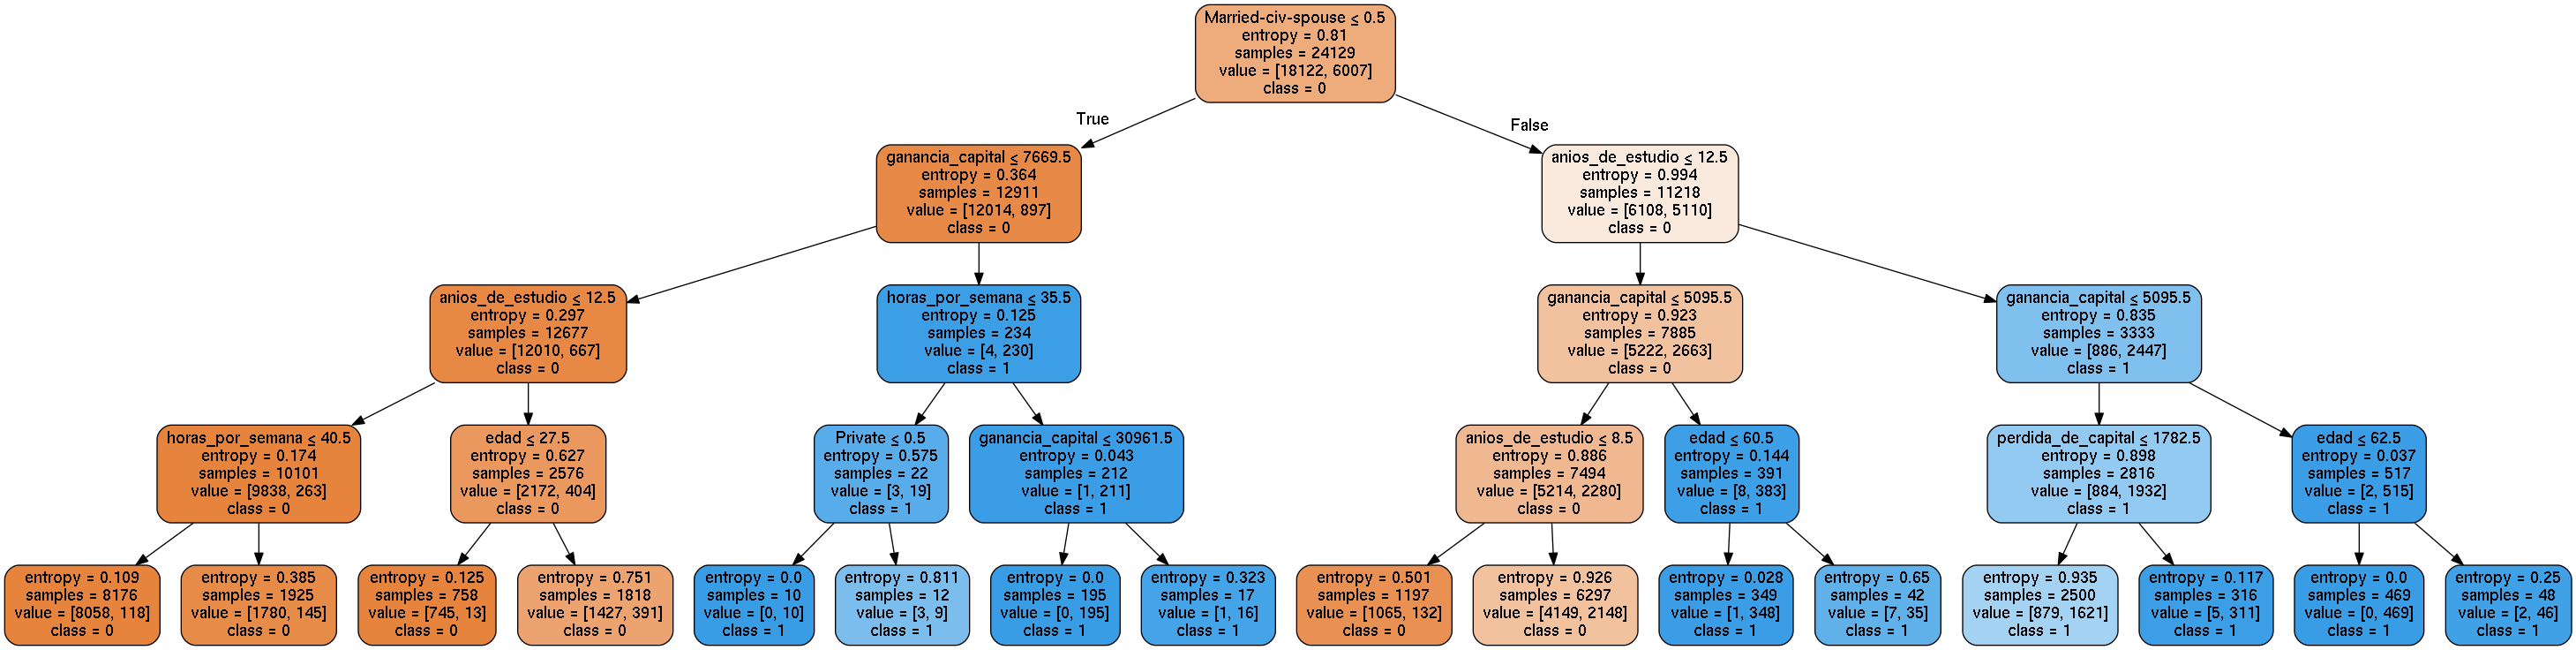

In [14]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

In [15]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

array([[4288,  244],
       [ 733,  768]])

0.838057351235
Normalized confusion matrix
[[ 0.94616064  0.05383936]
 [ 0.48834111  0.51165889]]


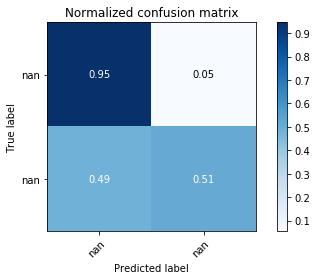

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Predict the response for test dataset
y_pred = decision_tree.predict(X_test)

display(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

ac=(tp+tn)/(tn+ fp+ fn+ tp)
ac

#plot_confusion_matrix(y_test, y_pred, Y)

plot_confusion_matrix(y_test, y_pred, Y,
                       normalize=True,
                      title='Normalized confusion matrix')
